In [51]:
#import basis and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
#import data
#train_data = pd.read_csv('data/train.csv')
#test_data = pd.read_csv('data/test.csv')

data = pd.read_csv('data/train.csv')


In [53]:
#split data into 30% test and 70% train, random_state = 123, stratify = 'label', xtrain, xtest, ytrain, ytest

train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['label'])

In [54]:
#random stratified sample the data 10% for quicker run time
## how can I stratify this?
#train_data = train.sample(frac=0.1, replace=True, random_state=123, )
#test_data = test.sample(frac=0.1, replace=True, random_state=123, )

train_data = train
test_data = test

train_data = train.sample(frac=0.1, replace=True, random_state=123, )
test_data = test.sample(frac=0.1, replace=True, random_state=123, )

In [55]:
#confirm stratification
train_data['label'].value_counts()

1    328
3    305
6    305
8    303
7    301
0    290
5    280
2    278
9    276
4    274
Name: label, dtype: int64

In [56]:
#confirm stratification
test_data['label'].value_counts()

7    153
2    139
8    133
1    129
5    126
3    125
4    122
0    118
9    113
6    102
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

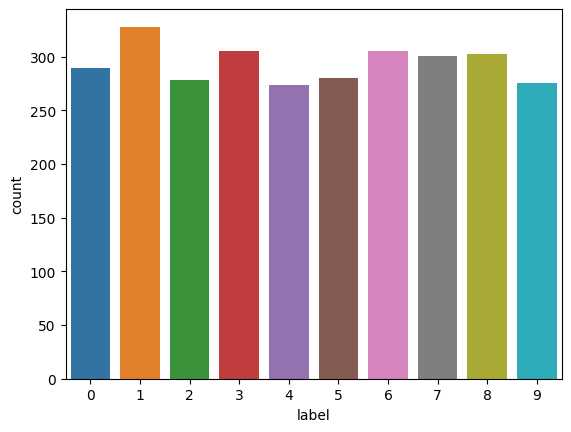

In [57]:
#graph confirm stratification
sns.countplot(x='label', data=train_data)

In [58]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34950,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41451,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35924,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25119,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5444,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_data.head()
#test_data doesnt have a label column... why is that?

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26062,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22093,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34818,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38536,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15492,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# parameters for SVM model
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
#drop the label column from the test data if exists
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [61]:
model_svc = SVC()

In [62]:
#fit the model
model_svc.fit(x_train, y_train)
#score the model
model_svc.score(x_train, y_train)

0.986734693877551

In [63]:
# predict the test data
y_pred = model_svc.predict(x_test)

#accuracy score
print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.9515873015873015
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       118
           1       0.95      0.98      0.97       129
           2       0.96      0.98      0.97       139
           3       0.93      0.92      0.92       125
           4       0.94      0.94      0.94       122
           5       0.94      0.95      0.94       126
           6       0.93      0.97      0.95       102
           7       0.98      0.97      0.98       153
           8       0.95      0.92      0.94       133
           9       0.93      0.89      0.91       113

    accuracy                           0.95      1260
   macro avg       0.95      0.95      0.95      1260
weighted avg       0.95      0.95      0.95      1260



## Seems like the model with default parameters performed best. With an accuracy of 98%

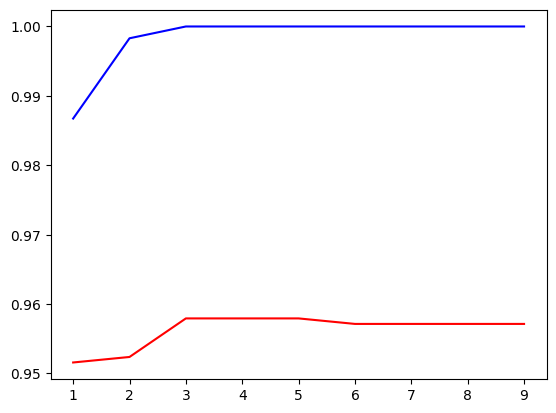

In [64]:
# for loop to create different svm models with different parameters store both the score and the model
training_acc = []
test_acc = []
maxRange = 10
for i in range(1, maxRange):
    model_svc = SVC(C=i)
    model_svc.fit(x_train, y_train)
    training_acc.append(model_svc.score(x_train, y_train))
    test_acc.append(model_svc.score(x_test, y_test))
    #if model_svc.score(x_test, y_test) = 1: stop the loop, since no test, use train for now
    # if model_svc.score(x_train, y_train) == 1:
    #     #break after next iteration
    #     break
    #print(model_svc.score(x_train, y_train))

plt.plot(range(1, len(training_acc)+1), training_acc, color="blue", label="training accuracy")
plt.plot(range(1, len(test_acc)+1), test_acc,  color="red", label="test accuracy")

In [65]:
# for loop to create different svm models with different gamma, C, and kernel parameters store both the score and the model
# training_acc = []
# test_acc = []
maxRange = 1000

#create a dictionary to store the parameters and the score
param_score = []

ker = ['linear', 'poly', 'rbf', 'sigmoid']

#for every kernel, run 5 random C and gamma values
for i in range(1, 10):
    #randomly select gamma, C, and kernel
    #random float
    gamma = np.random.uniform(1, maxRange)
    C = np.random.uniform(1, maxRange)
    for kernel in ker:
        model_svc = SVC(gamma=gamma, C=C, kernel=kernel)

        # #fit the model
        model_svc.fit(x_train, y_train)

        #save the parameters and the score
        param_score.append({'gamma': gamma, 'C': C, 'kernel': kernel, 'score': model_svc.score(x_test, y_test)})
        #print(model_svc.score(x_train, y_train))

In [66]:
#convert param_score to a dataframe
param_score = pd.DataFrame(param_score)
param_score

,gamma,C,kernel,score
0,779.383271,989.780894,linear,0.906349
1,779.383271,989.780894,poly,0.934921
2,779.383271,989.780894,rbf,0.102381
3,779.383271,989.780894,sigmoid,0.102381
4,923.801372,215.448051,linear,0.906349
5,923.801372,215.448051,poly,0.934921
6,923.801372,215.448051,rbf,0.102381
7,923.801372,215.448051,sigmoid,0.102381
8,973.199238,940.679425,linear,0.906349
9,973.199238,940.679425,poly,0.934921


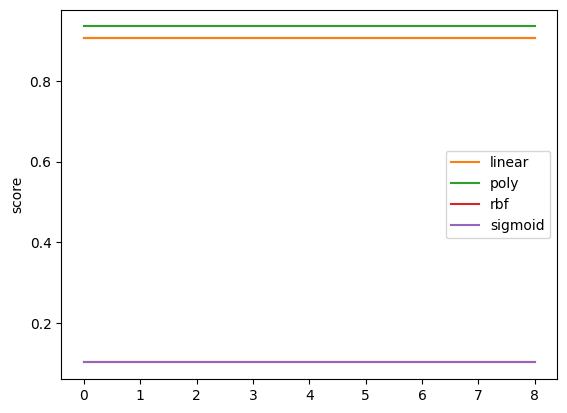

In [67]:
temp = param_score[param_score.kernel == 'linear']
temp.reset_index(inplace=True)
sns.lineplot(x=temp.index, y='score', data=temp)

#for loop to sns plots to compare the different kernels
for kernel in ker:
    temp = param_score[param_score.kernel == kernel]
    temp.reset_index(inplace=True)
    sns.lineplot(x=temp.index, y='score', data=temp, label=kernel)
    

In [68]:
# #figure size
# plt.figure(figsize=(10, 6))
# #plot the training accuracy from 1 to maxRange
# plt.plot(range(1, len(training_acc)+1), training_acc,color="blue", label="training accuracy")
# plt.plot(range(1, len(training_acc)+1), test_acc, color = 'red', label="testing accuracy")

# #show data by kernel, 
# plt.legend()
# plt.show()


In [69]:
# print(param_score)

## successful parameters
{1: {'gamma': 17, 'C': 17, 'kernel': 'linear', 'score': 1.0},
 3: {'gamma': 8, 'C': 18, 'kernel': 'poly', 'score': 1.0},
 6: {'gamma': 15, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 8: {'gamma': 12, 'C': 13, 'kernel': 'poly', 'score': 1.0},
 10: {'gamma': 18, 'C': 14, 'kernel': 'linear', 'score': 1.0},
 14: {'gamma': 14, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 15: {'gamma': 9, 'C': 12, 'kernel': 'poly', 'score': 1.0},
 16: {'gamma': 16, 'C': 5, 'kernel': 'poly', 'score': 1.0},
 17: {'gamma': 11, 'C': 14, 'kernel': 'poly', 'score': 1.0},
 18: {'gamma': 13, 'C': 13, 'kernel': 'poly', 'score': 1.0},
 19: {'gamma': 11, 'C': 3, 'kernel': 'linear', 'score': 1.0}}

In [70]:
#using the best parameters from the loop above
model_svcFinal = SVC(gamma='auto', C=3, kernel='poly')
model_svcFinal.fit(x_train, y_train)
model_svcFinal.score(x_train, y_train)


1.0

In [71]:
#score test data
model_svcFinal.score(x_test, y_test)


0.9349206349206349

In [72]:
#predict test data
y_pred = model_svcFinal.predict(x_test)

#accuracy score

print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))


0.9349206349206349
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       118
           1       0.86      0.97      0.91       129
           2       0.96      0.92      0.94       139
           3       0.88      0.92      0.90       125
           4       0.95      0.94      0.95       122
           5       0.97      0.91      0.94       126
           6       0.95      0.95      0.95       102
           7       0.95      0.97      0.96       153
           8       0.95      0.90      0.93       133
           9       0.94      0.91      0.93       113

    accuracy                           0.93      1260
   macro avg       0.94      0.93      0.93      1260
weighted avg       0.94      0.93      0.94      1260

